In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_365246/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
file_path = '../merged.csv'
column_names = ['delta', 'state', 'time', 'occupation', 'fairness']
df = pd.read_csv(file_path)

In [3]:
csv_dict = []
with open(file_path, 'r') as file:
    # Iterate over each line in the file
    for line in file:
        # Split the line content by comma
        line_data = line.strip().split(',')

        if len(line_data) == 7:
            seven_keys = ['delta', 'state', 'time', 'occupation', 'fairness', 'allocated', 'skipped']
            csv_dict.append(dict(zip(seven_keys, line_data)))

        else:
            print(len(line_data))
        #print(line_data)
        # Print or process the split data as needed
        #print(line_data)
df_dtypes = {'delta' : float, 'state' : str, 'time' : float, 'occupation' : float, 'fairness' : float, 'allocated' : int, 'skipped' : int}
df = pd.DataFrame(csv_dict)
for k, v in df_dtypes.items():
    df[k] = df[k].astype(v)

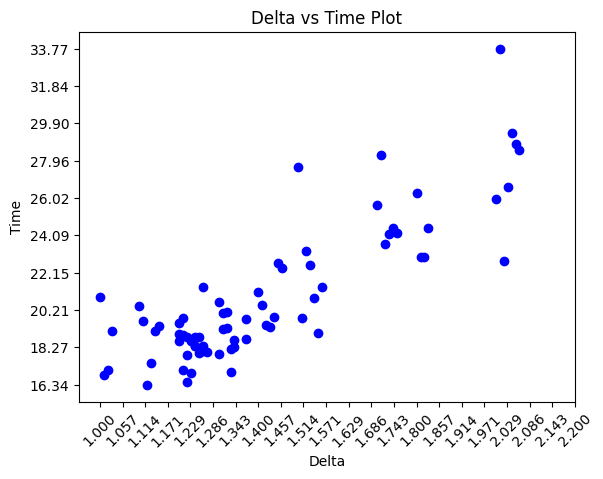

In [4]:
df = df[df['state'] != 'Stopped']
df = df.sort_values(by='delta')

# Extract relevant columns
delta_values = df['delta']
time_values = df['time']

# Plot the data
plt.scatter(delta_values, time_values, marker='o', color='b')

# Set labels and title
plt.xlabel('Delta')
plt.ylabel('Time')
plt.title('Delta vs Time Plot')

plt.yticks(np.linspace(df['time'].min(), df['time'].max(), 10))
plt.xticks(np.linspace(1, 2.2, 22))

plt.xticks(rotation=45)

# Show the plot

plt.show()

In [5]:
print(len(df))

74


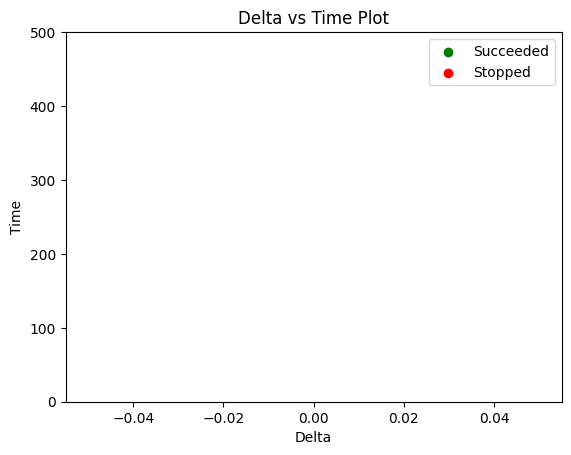

In [6]:
df_succeeded = df[df['state'].astype(str) == ' Succeeded']

# Filter rows for 'stopped' state
df_stopped = df[df['state'].astype(str) == ' Stopped']

# Extract relevant columns
delta_values_succeeded = df_succeeded['delta']
time_values_succeeded = df_succeeded['time']

delta_values_stopped = df_stopped['delta']
time_values_stopped = df_stopped['time']

# Plot 'succeeded' data in green
plt.scatter(delta_values_succeeded, time_values_succeeded, marker='o', color='green', label='Succeeded')
plt.scatter(delta_values_stopped, time_values_stopped, marker='o' , color='red', label='Stopped')


plt.ylim(0, 500)

# Set labels and title
plt.xlabel('Delta')
plt.ylabel('Time')
plt.title('Delta vs Time Plot')

# Show legend
plt.legend()

# Show the plot
plt.show()

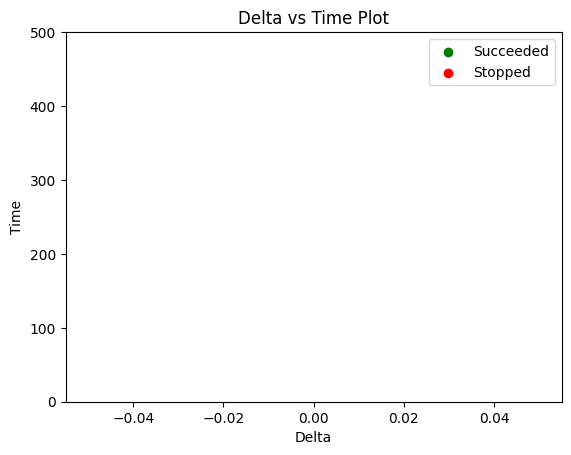

In [7]:
df_succeeded = df[df['state'].astype(str) == ' Succeeded']

# Filter rows for 'stopped' state
df_stopped = df[df['state'].astype(str) == ' Stopped']

# Extract relevant columns
delta_values_succeeded = df_succeeded['delta']
occupation_values_succeeded = df_succeeded['occupation']

delta_values_stopped = df_stopped['delta']
occupation_values_stopped = df_stopped['occupation']

# Plot 'succeeded' data in green
plt.scatter(occupation_values_succeeded, time_values_succeeded, marker='o', color='green', label='Succeeded')
plt.scatter(occupation_values_stopped, time_values_stopped, marker='o' , color='red', label='Stopped')


plt.ylim(0, 500)

# Set labels and title
plt.xlabel('Delta')
plt.ylabel('Time')
plt.title('Delta vs Time Plot')

# Show legend
plt.legend()

# Show the plot
plt.show()